In [1]:
# d'après le challenge Kaggle : https://www.kaggle.com/c/titanic

# TP Decision Tree : entropie

In [2]:
import numpy as np # import la librairie numpy (calcul scientifique)
import matplotlib.pyplot as plt # librairie pour afficher les graphs.
%matplotlib inline  
import pandas as pd #for manipulating data 

In [5]:
# Charge les donnees utile pour le TP
def get_titanic_data():
    
    
    np.random.seed(42)
    # get titanic & test csv files as a DataFrame
    titanic_df = pd.read_csv("train_titanic.csv", dtype={"Age": np.float64}, )

    # drop unnecessary columns, these columns won't be useful in analysis and prediction
    titanic_df = titanic_df.drop(['PassengerId','Name','Ticket',  'SibSp',  'Parch' ,    'Fare','Cabin'], axis=1)


    # only in titanic_df, fill the two missing values with the most occurred value, which is "S".
    titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")


    #AGE
    # get average, std, and number of NaN values in titanic_df
    average_age_titanic   = titanic_df["Age"].mean()
    std_age_titanic       = titanic_df["Age"].std()
    count_nan_age_titanic = titanic_df["Age"].isnull().sum()
    # generate random numbers between (mean - std) & (mean + std)
    rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
    titanic_df['Age'].dropna().astype(int)
    # fill NaN values in Age column with random values generated
    #titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1    
    titanic_df["Age"] = titanic_df["Age"].fillna(30)
    # convert from float to int
    titanic_df['Age'] = titanic_df['Age'].astype(int)
    
    y = titanic_df['Survived']
    X = titanic_df.drop( ["Survived"], axis = 1)
    print("X data :\n ")
    print(X.head())
    print("\n\n y label : \n")
    print(y.head())
    
    return X,y

In [6]:
X, y = get_titanic_data()
X_array, y_array = np.array(X), np.array(y)

X data :
 
   Pclass     Sex  Age Embarked
0       3    male   22        S
1       1  female   38        C
2       3  female   26        S
3       1  female   35        S
4       3    male   35        S


 y label : 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


## Exercices : 

1. Exploration :


    - Afficher, en fonction du genre, la proportion de personnes ayant survécu. (i.e. proba(Survivre | genre = femme) et proba(Survivre | genre = homme)). 
    - De même avec la classe (la 1er classe étant la plus chère) et le port de départ ##(Ici, 1 = Cherbourg; 2 = Queenstown; 3 = Southampton).
    - Quel est le facteur qui semble, a priori, le plus informatif ?

2. Analyse :

    - Coder la fonction d'entropie. Puis la visualiser sur [0,1].        
    - Calculer la quantité d'information $I$ donnée par le genre.
    - De même pour la classee et le port d'embarquation.
    - Quel est le facteur qui apporte ffectivement le plus d'information ?

3. Model et prediction

    - Entrainer un arbre de decision sur ces données,
    - l'attribut 'feature_importances_' de tree.DecisionTreeClassifier() doone t'il les même résultats ?

### proba de survivre en fonction du genre

In [7]:
nb_male = np.sum(X.Sex == 'male')
nb_male_survived = np.sum((X.Sex == 'male') &(y == 1))
perc_male_survived = nb_male_survived / nb_male
print(perc_male_survived)

0.188908145581


In [8]:
nb_female = np.sum(X.Sex == 'female')
nb_female_survived = np.sum((X.Sex == 'female') &(y == 1))
perc_female_survived = nb_female_survived / nb_female
print(perc_female_survived)

0.742038216561


In [9]:
print('Femmes ayant survecut:', np.round(perc_female_survived,2),\
      '%.\n Hommes ayant survecut : ', np.round(perc_male_survived,2),'%')

Femmes ayant survecut: 0.74 %.
 Hommes ayant survecut :  0.19 %


<Container object of 2 artists>

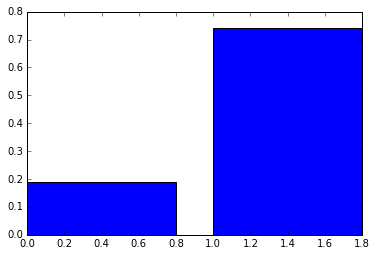

In [10]:
plt.bar([0,1], [perc_male_survived, perc_female_survived])

## Fonction du port et de la classe du billet 

In [11]:
nb_class1 = np.sum(X.Pclass == 1)
nb_class1_survived = np.sum((X.Pclass == 1) &(y == 1))
perc_class1_survived = nb_class1_survived / nb_class1
print(perc_class1_survived)

nb_class2 = np.sum(X.Pclass == 2)
nb_class2_survived = np.sum((X.Pclass == 2) &(y == 1))
perc_class2_survived = nb_class2_survived / nb_class2
print(perc_class2_survived)

nb_class3 = np.sum(X.Pclass == 3)
nb_class3_survived = np.sum((X.Pclass == 3) &(y == 1))
perc_class3_survived = nb_class3_survived / nb_class3
print(perc_class3_survived)

0.62962962963
0.472826086957
0.242362525458


In [12]:
nb_EmbarkedQ = np.sum(X.Embarked == 'Q')
nb_EmbarkedQ_survived = np.sum((X.Embarked == 'Q') &(y == 1))
perc_EmbarkedQ_survived = nb_EmbarkedQ_survived / nb_EmbarkedQ
print(perc_EmbarkedQ_survived)

nb_EmbarkedS = np.sum(X.Embarked == 'S')
nb_EmbarkedS_survived = np.sum((X.Embarked == 'S') &(y == 1))
perc_EmbarkedS_survived = nb_EmbarkedS_survived / nb_EmbarkedS
print(perc_EmbarkedS_survived)

nb_EmbarkedC = np.sum(X.Embarked == 'C')
nb_EmbarkedC_survived = np.sum((X.Embarked == 'C') &(y == 1))
perc_EmbarkedC_survived = nb_EmbarkedC_survived / nb_EmbarkedC
print(perc_EmbarkedC_survived)

0.38961038961
0.339009287926
0.553571428571


## Entropy 

I = -p * log(p) - (1-p) * log(1- p) 
 avec p = Proba(survivre | genre = femme) 
(Rappel : un faible I est plus informatif qu'un I élevé.)


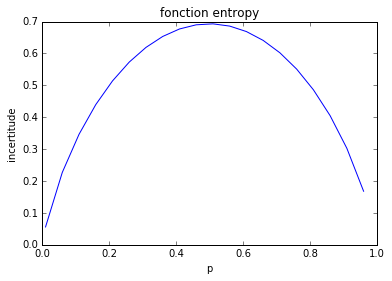

In [13]:
print("I = -p * log(p) - (1-p) * log(1- p) \n \
avec p = Proba(survivre | genre = femme) \n\
(Rappel : un faible I est plus informatif qu'un I élevé.)")

def entropy(p):
    if p == 0 or p ==1 :
        return 0
    else:
        return - p*np.log(p) - (1-p)*np.log(1-p)
    
list_p = np.arange(0.01,.99,0.05)
plt.plot(list_p, [entropy(p) for p in list_p])

plt.title('fonction entropy')
plt.xlabel('p')
plt.ylabel('incertitude')

## Information I

In [14]:
I_femme = entropy(perc_female_survived)
print('I_femme =', I_femme)

I_femme = 0.570914192248


In [15]:


# Quantité d'information donnée par le genre.

print("I_genre = proba(femme) * I(genre=femme) + proba(homme) * I(genre=homme)")

genre = X.Sex == 'male'
proba_homme = np.sum(genre) / len(genre)
proba_femme = (len(genre) - np.sum(genre)) / len(genre)

I_genre = proba_homme * entropy(perc_male_survived) + proba_femme * entropy(perc_female_survived)
print('Information donnée par le genre : I_genre =', I_genre)


# Quantité d'information donnée par la classe du billet.

classe = X.Pclass
proba_classe1 = list(classe==1).count(True) / len(classe)
proba_classe2 = list(classe==2).count(True) / len(classe)
proba_classe3 = list(classe==3).count(True) / len(classe)


I_classe = proba_classe1 * entropy(perc_class1_survived) + \
            proba_classe2 * entropy(perc_class2_survived) + \
            proba_classe3 * entropy(perc_class3_survived)

print('Information donnée par la classe : I_classe =' , I_classe)


# Quantité d'information donnée par le port
port = X.Embarked
proba_portQ = list(port=='Q').count(True) / len(port)
proba_portC = list(port=='C').count(True) / len(port)
proba_portS = list(port=='S').count(True) / len(port)

I_port = proba_portQ * entropy(perc_EmbarkedQ_survived) + \
            proba_portC * entropy(perc_EmbarkedC_survived) + \
            proba_portS * entropy(perc_EmbarkedS_survived)

print('Information donnée par le port : I_port =', I_port)


I_genre = proba(femme) * I(genre=femme) + proba(homme) * I(genre=homme)
Information donnée par le genre : I_genre = 0.515041484275
Information donnée par la classe : I_classe = 0.607804720836
Information donnée par le port : I_port = 0.65167872377


## Bilan 

In [16]:
from sklearn import tree

print("Bilan : \n Le genre a une quantite d'information plus faible, il est donc le facteur le plus discriminant")

DT = tree.DecisionTreeClassifier()
X_array = X_array.toint() #todo !
DT.fit(X_array,y)
print('type - importance (higher is better)')
print('')
for type,imp in zip(['Class', 'Age', 'N_fs', 'N_pe', 'tarif', 'port', 'genre'],DT.feature_importances_):
    print(type,'-',imp)
    
print("\n On retrouve que le genre est un des facteurs les plus discriminant (avec l'age et le tarif des billets).\
\n Ici le port d'embarquement ne donnes presque aucune information.")


Bilan : 
 Le genre a une quantite d'information plus faible, il est donc le facteur le plus discriminant


AttributeError: 'numpy.ndarray' object has no attribute 'toint'